In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
# from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

In [29]:
data = pd.read_csv('online_shoppers_intention.csv')

In [30]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


EDA

In [31]:
print(data.shape)
data.info()

(12330, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficTyp

In [32]:
data.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [33]:
data.select_dtypes(bool).describe().T

,count,unique,top,freq
Weekend,12330,2,False,9462
Revenue,12330,2,False,10422


In [34]:
data.select_dtypes(object).describe().T

,count,unique,top,freq
Month,12330,10,May,3364
VisitorType,12330,3,Returning_Visitor,10551


Data Cleaning and handling

In [35]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Check for Duplicates

In [36]:
data.duplicated().any()

True

In [37]:
data.duplicated().sum()

125

Numerical Feature Count

In [38]:
num_cols = data.select_dtypes("number").columns.tolist()
len(num_cols)

14

Checking Numerical distribbution in univariate form 

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

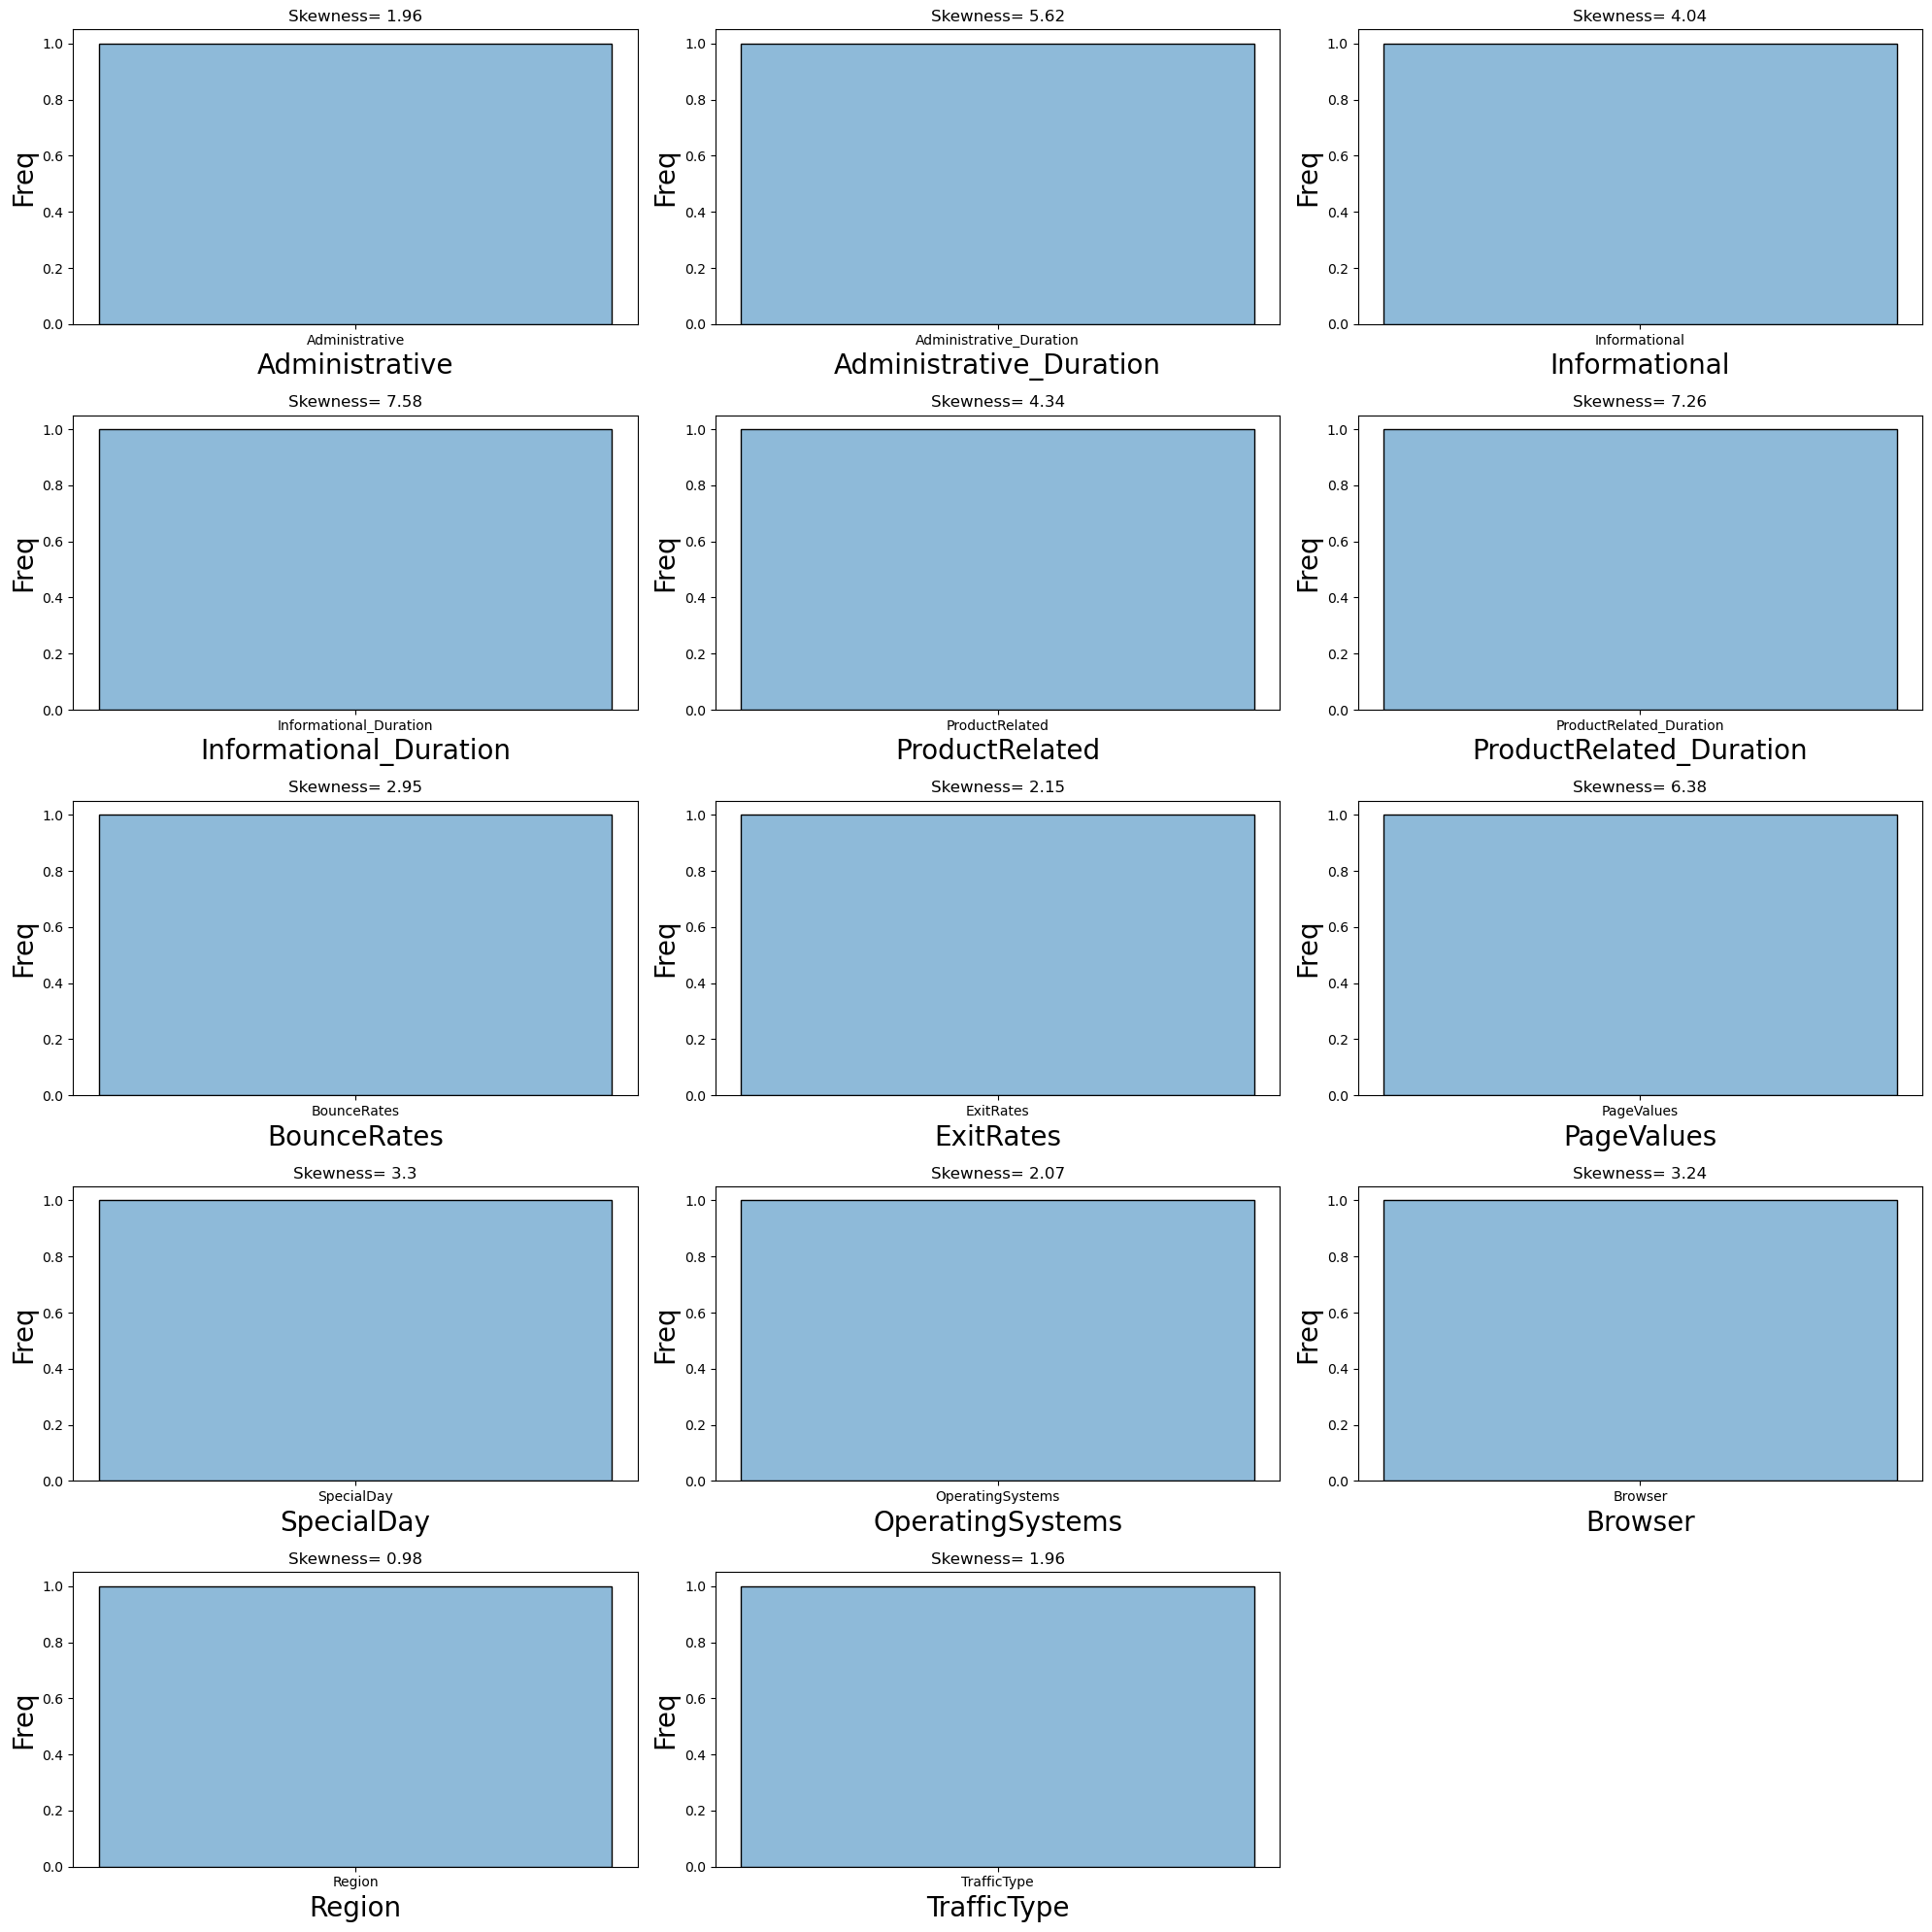

In [39]:
plt.figure(figsize=(20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    ax = sns.histplot(
        data=[num_cols[i]],
        kde = True
    )
    ax.set_xlabel(num_cols[i], fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.set_title(f"Skewness= {str(round(data[num_cols[i]].skew(),2))}")
plt.tight_layout()
plt.show()

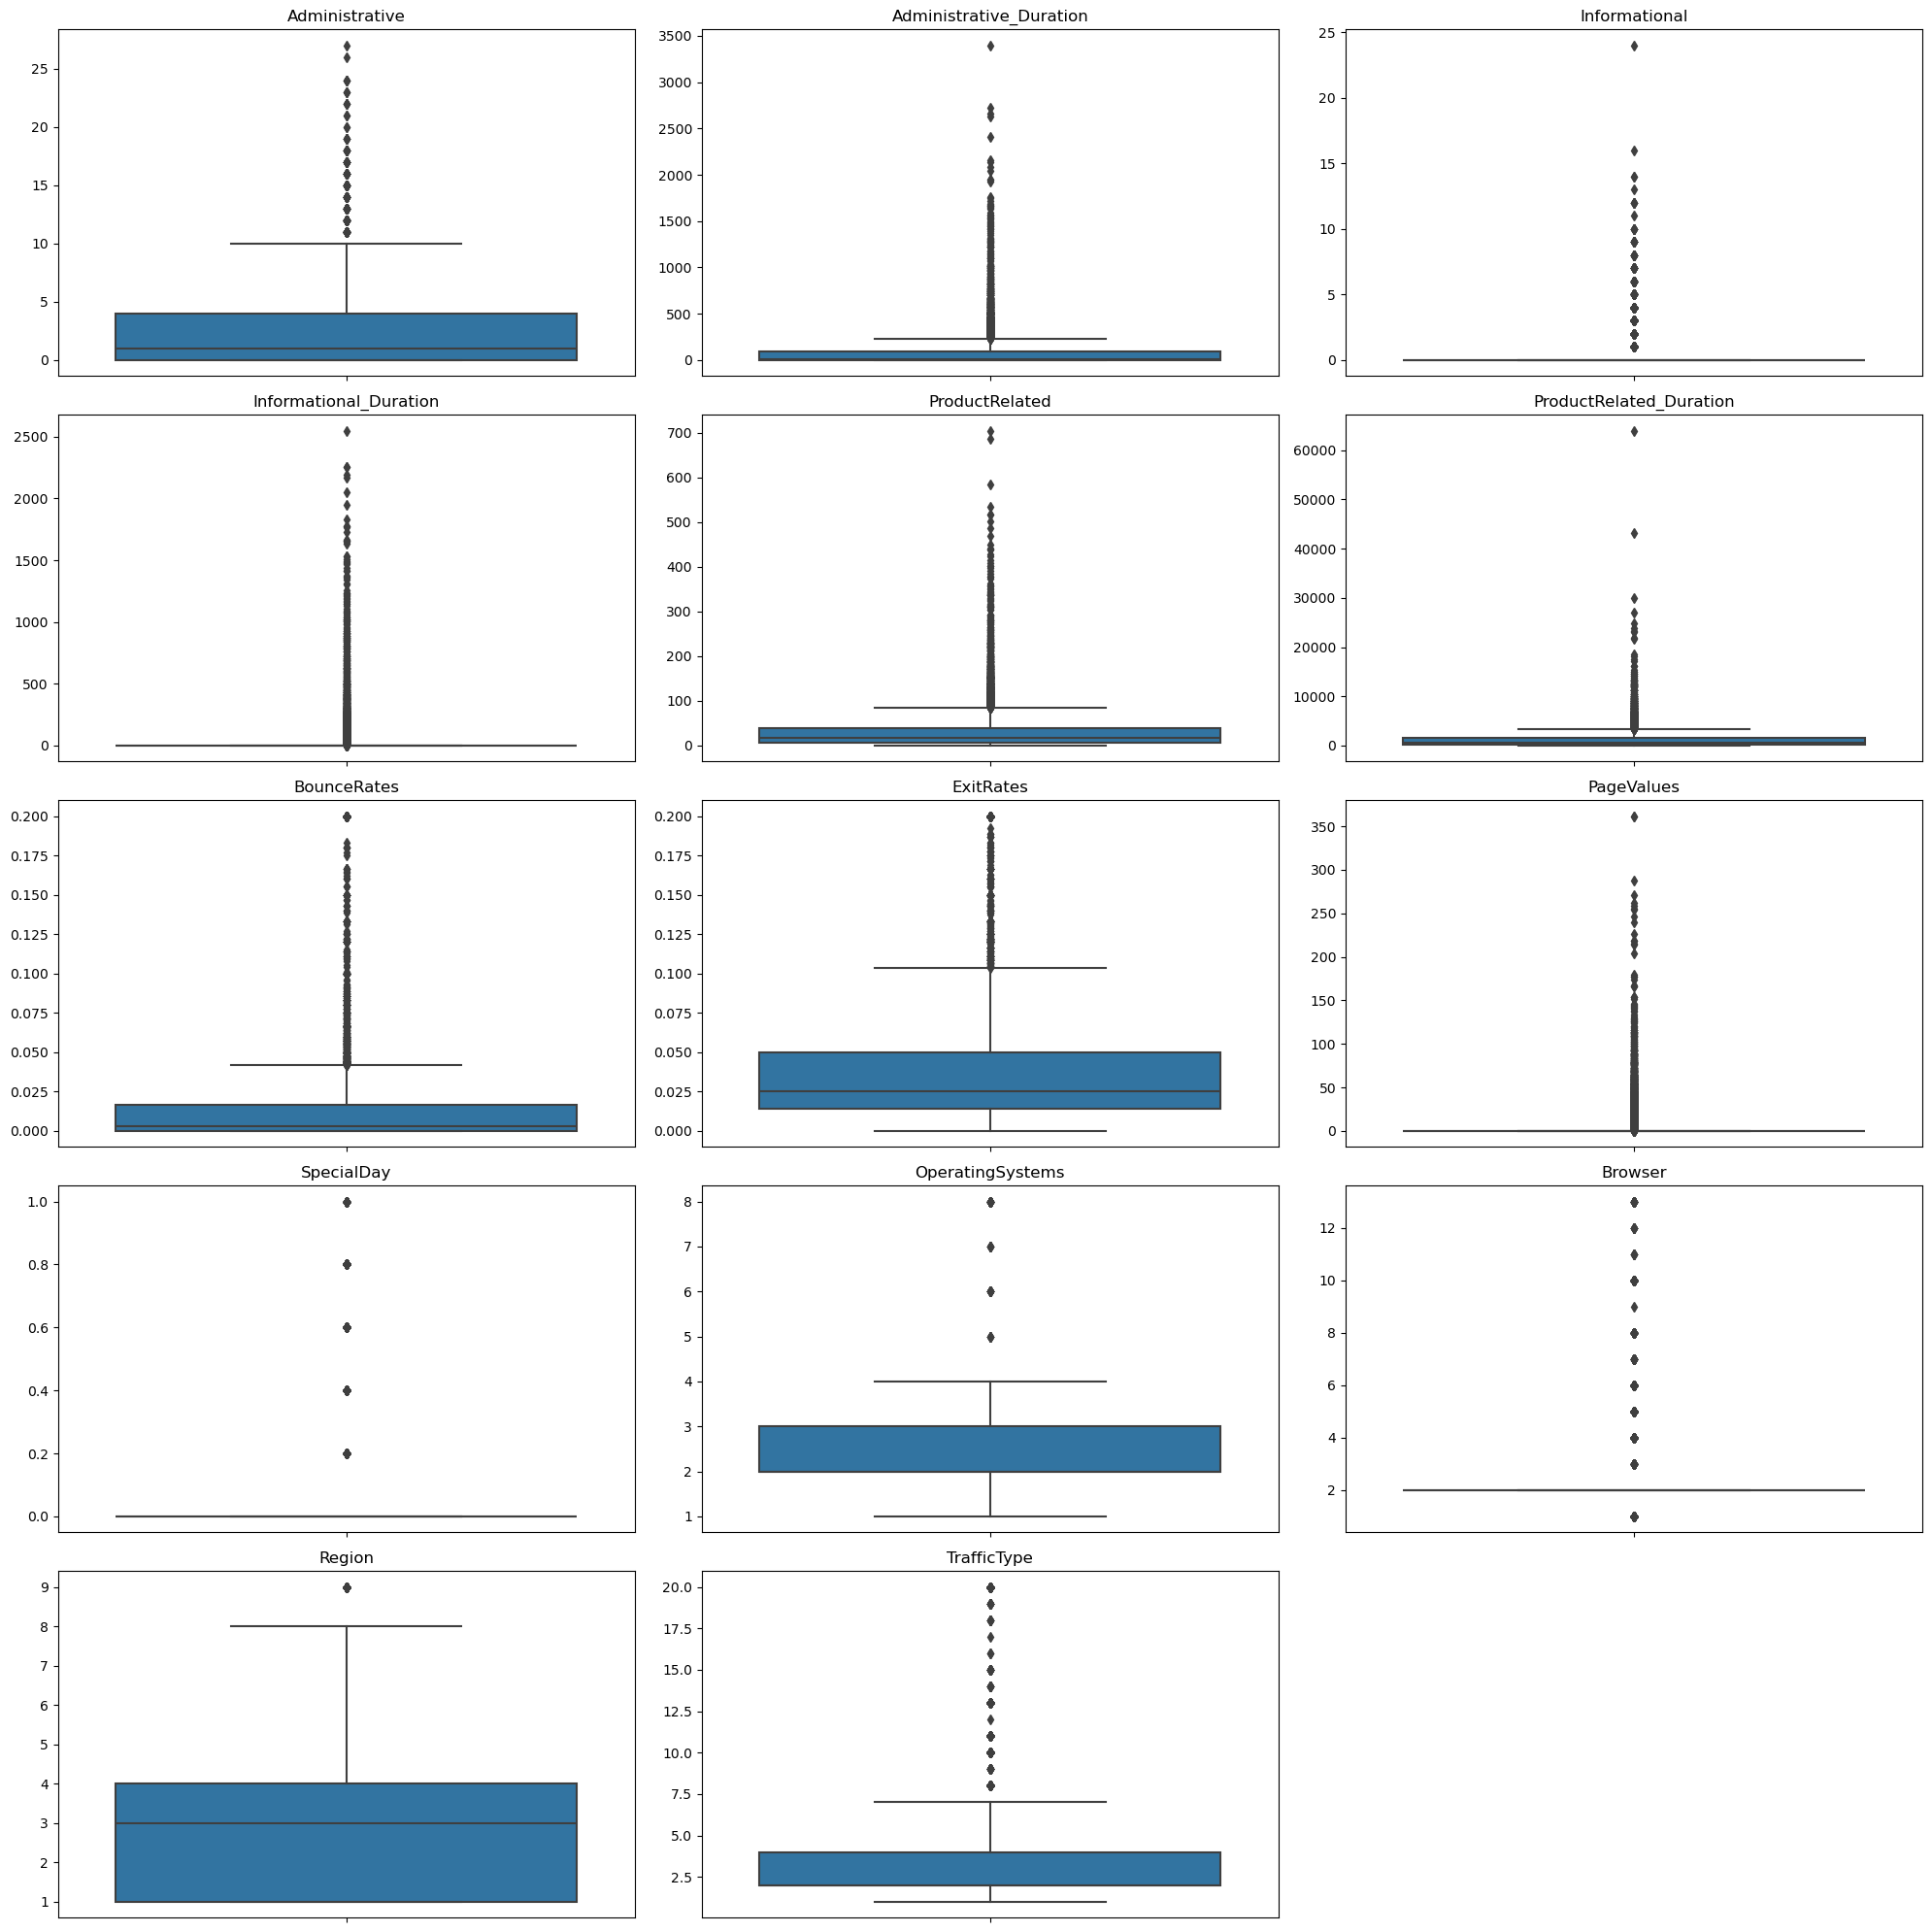

In [40]:
plt.figure(figsize=(20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    ax = sns.boxplot(
        y = data[num_cols[i]]
    )
    ax.set_ylabel('')
    ax.set_title(num_cols[i])
plt.tight_layout()
plt.show()

Bivariate Analysis

In [41]:
palette = {True : '#228B22', False : '#808080'}

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

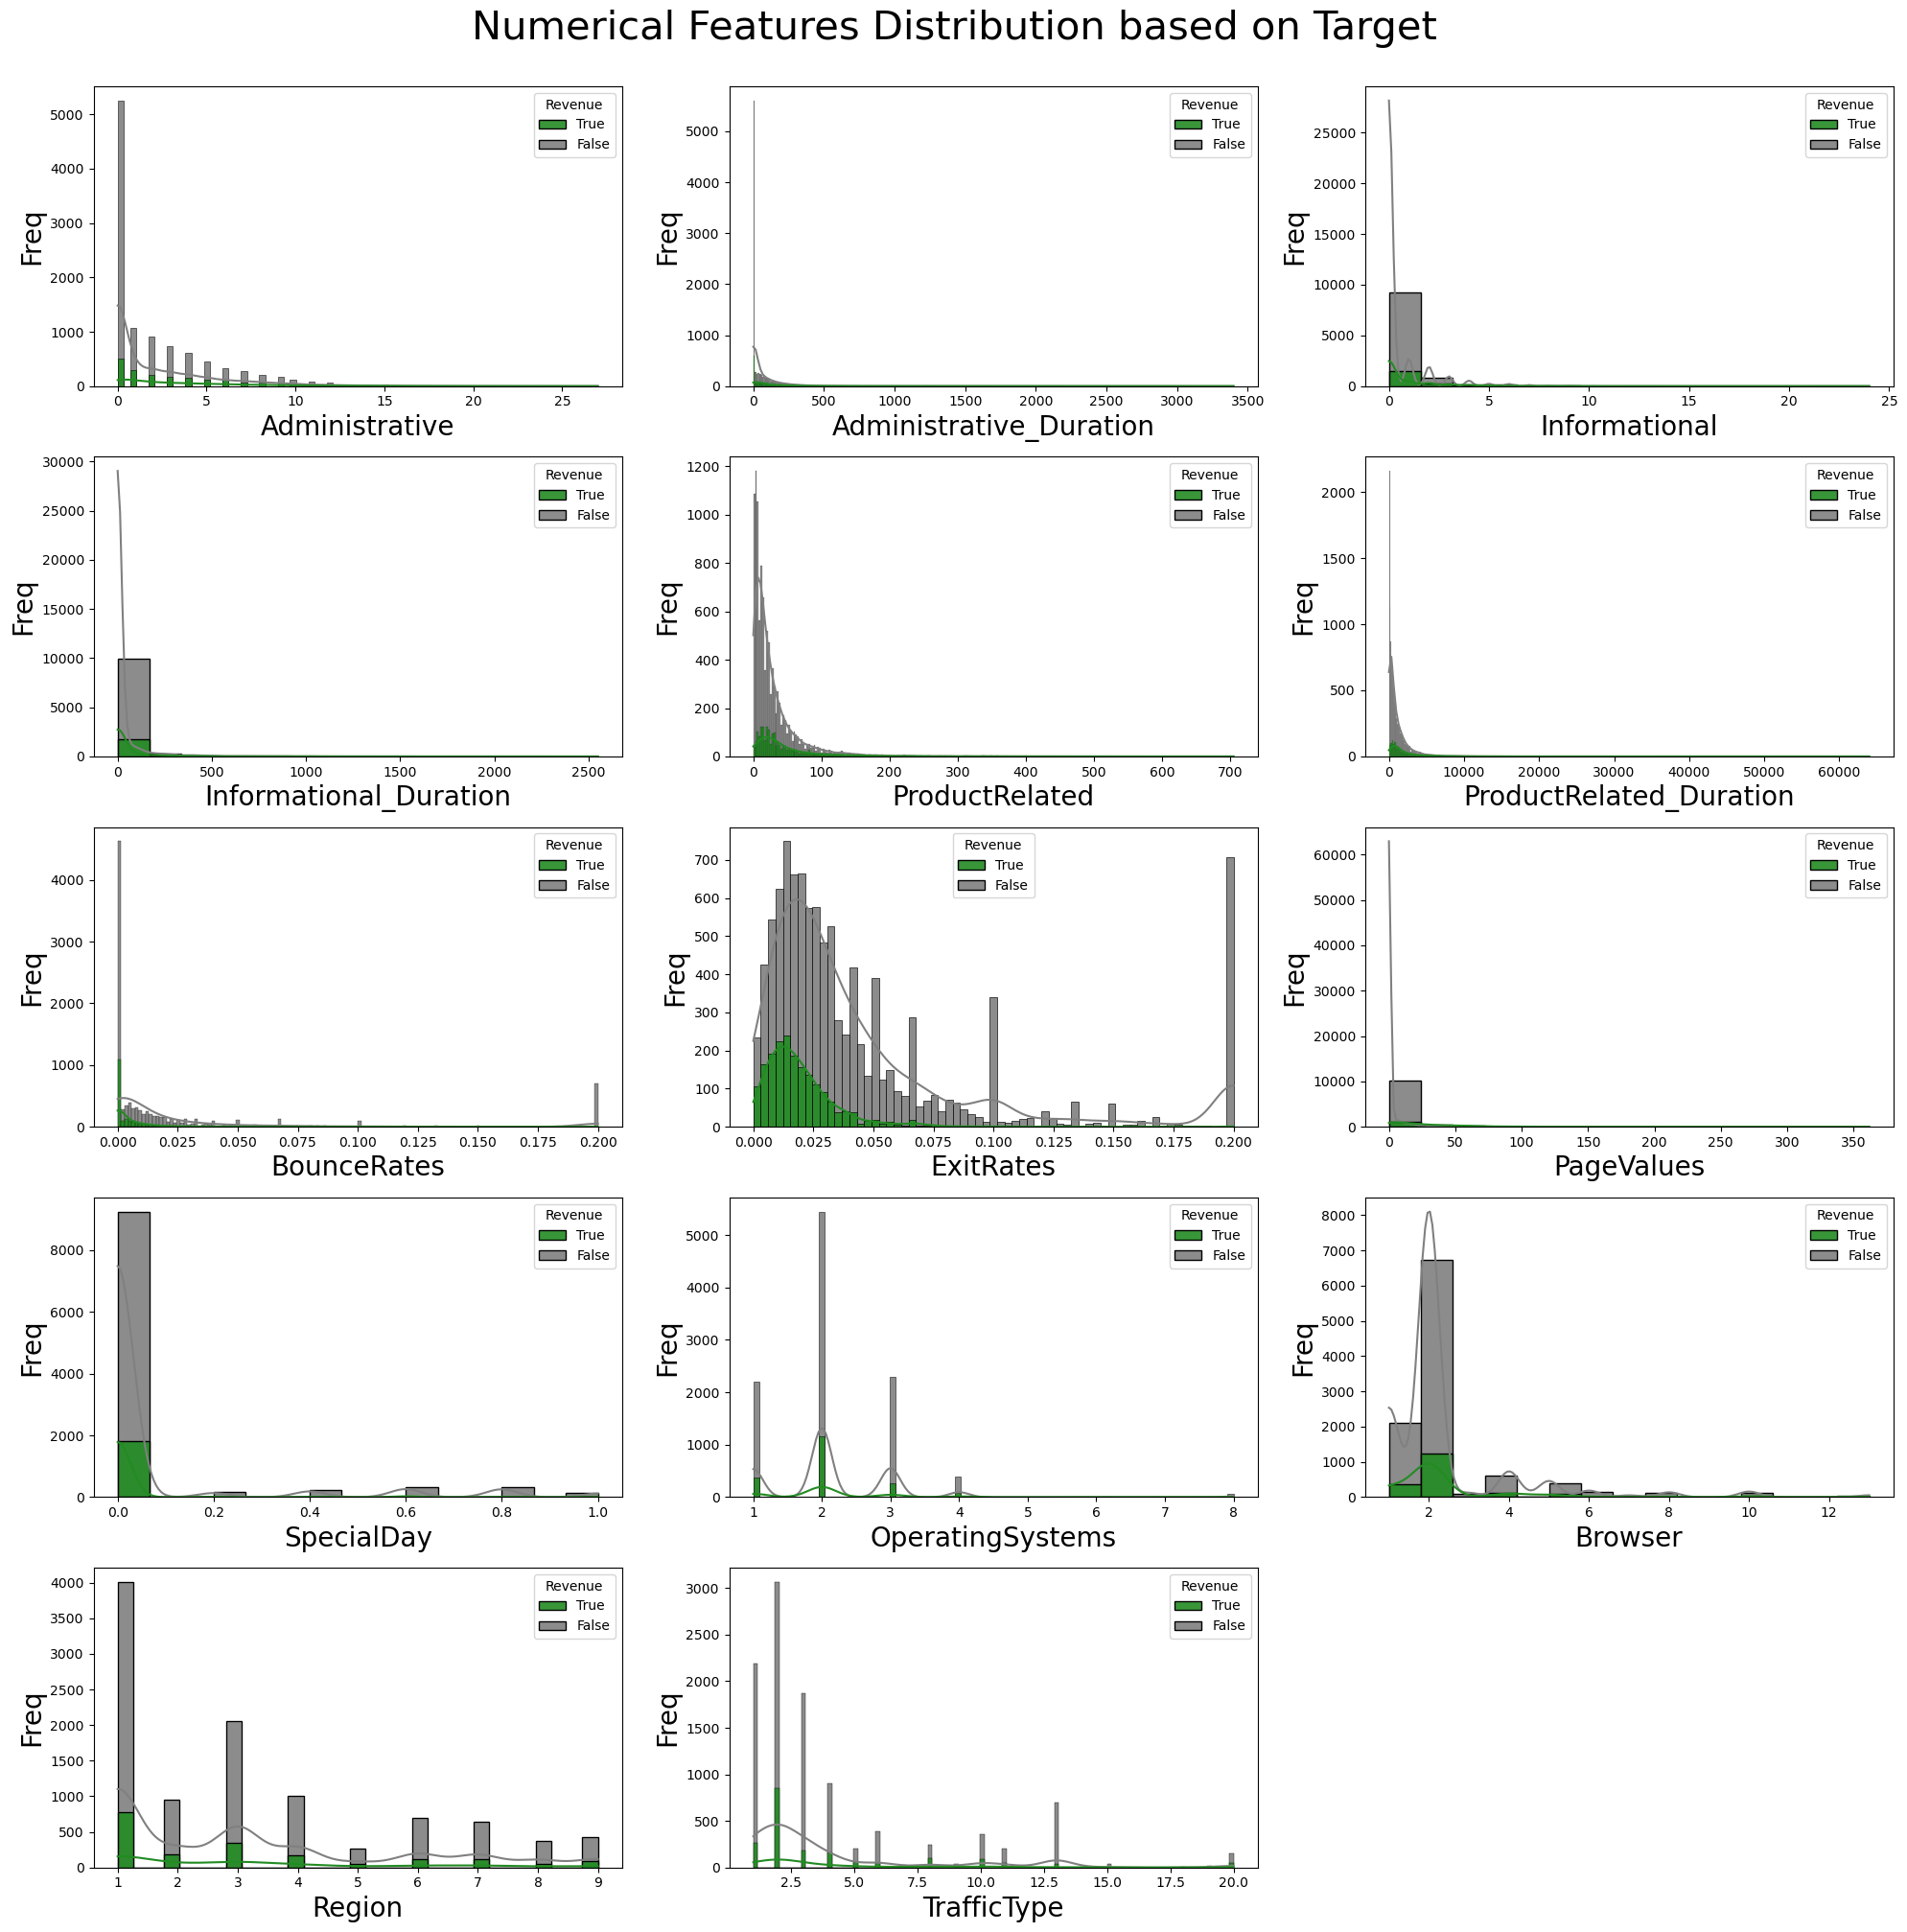

In [42]:
plt.figure(figsize=(20, 20))
plt.suptitle('Numerical Features Distribution based on Target', fontsize = 30, y = 1.005)
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    ax = sns.histplot(
        x = data[num_cols[i]],
        kde = True,
        hue = data['Revenue'],
        hue_order = [True, False],
        palette = palette, alpha = 0.9
    )
    ax.set_xlabel(num_cols[i], fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
plt.tight_layout()
plt.show()

Multivariate Analysis

c:\Users\User\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


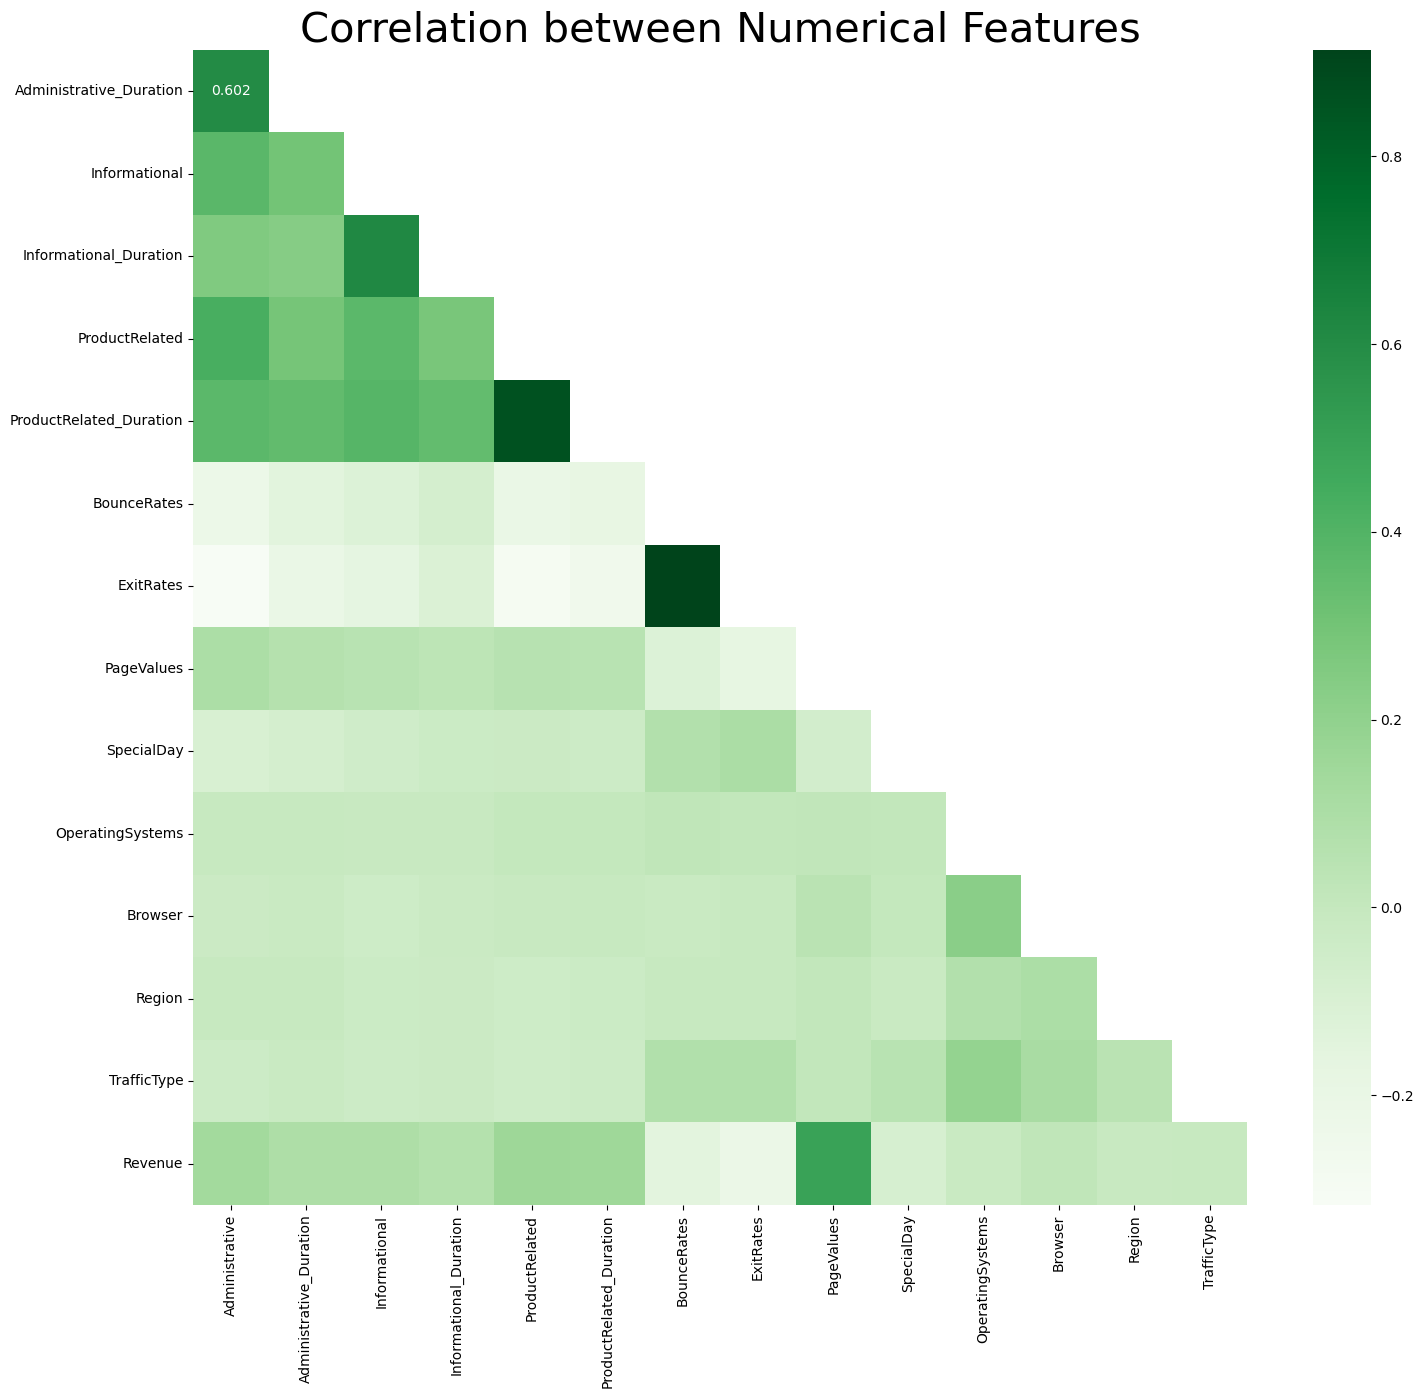

In [43]:
df_corr = data.copy()
df_corr['Revenue'] = np.where(df_corr['Revenue'] == True, 1, 0)

corr_ = df_corr[num_cols + ["Revenue"]].corr(method = 'pearson')
corr_ = corr_.mask(np.tril(np.ones(corr_.shape)).T.astype(np.bool_)).drop(columns=['Revenue'], index = 'Administrative')

plt.figure(figsize = (17, 15))
sns.heatmap(
    corr_,
    annot = True,
    fmt = '.3f',
    cmap = 'Greens'
)
plt.title("Correlation between Numerical Features",fontsize=30)
plt.yticks(rotation=0)
plt.show()

Highly correlated (+ve) both increase simultanelously, -ve if decrease, one decresae andother inresea

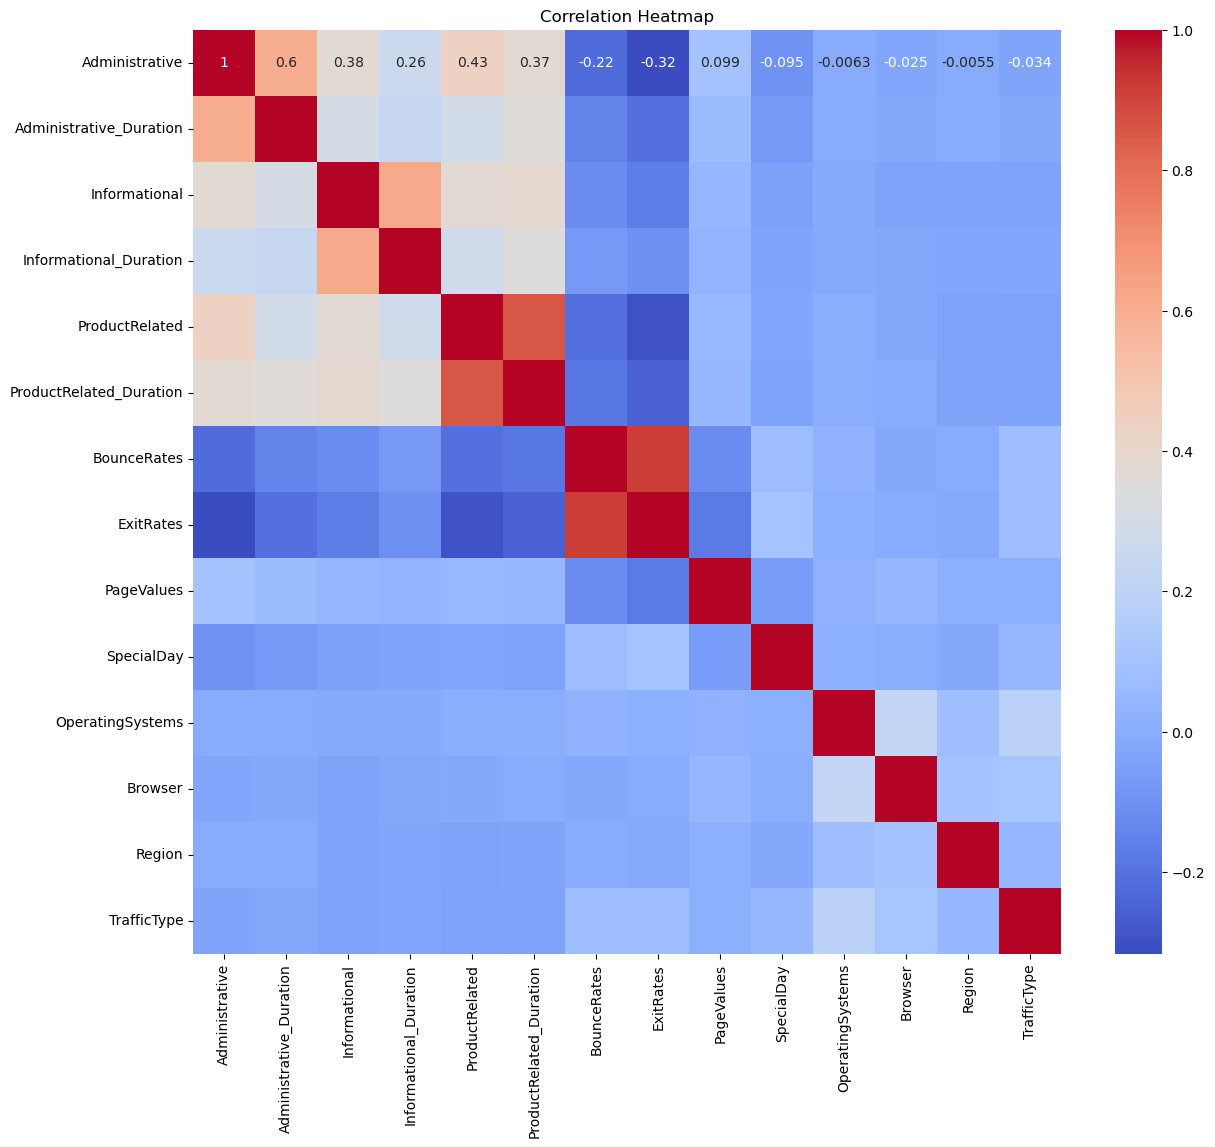

In [44]:
# Select only numeric columns for correlation heatmap
numeric_cols = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot the correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [45]:
# Compute the mean for numeric columns only
numeric_cols_mean = data.select_dtypes(include=[np.number]).mean()

# Fill missing values in numeric columns with their respective means
data.fillna(numeric_cols_mean, inplace=True)

# Verify there are no more missing values
print(data.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [46]:
highly_correlated = corr_.round(decimals = 3)[corr_.round(decimals = 3)> 0.5].dropna(axis=0, how="all").dropna(axis=1, how="all")
highly_correlated

,Administrative,Informational,ProductRelated,BounceRates
Administrative_Duration,0.602,NaN,NaN,NaN
Informational_Duration,NaN,0.619,NaN,NaN
ProductRelated_Duration,NaN,NaN,0.861,NaN
ExitRates,NaN,NaN,NaN,0.913


## Target Variable


Checking the target variable distribution.

## checking Target variable distribution before SMOTE


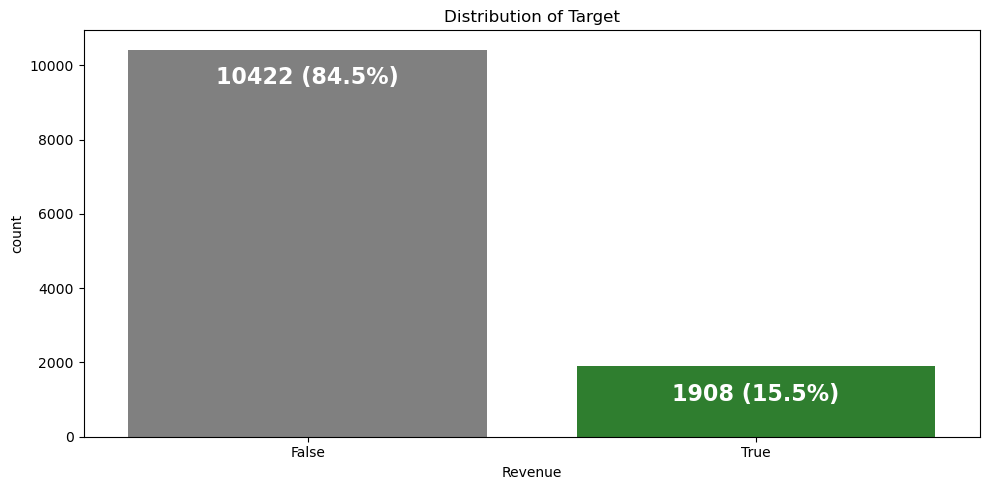

In [47]:

plt.figure(figsize = (10, 5))
ax = sns.countplot(
    x = data["Revenue"], palette = palette
)
ax.set_title("Distribution of Target")
# annotate bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f') + " (" + format(p.get_height()*100/len(data), '.1f') + "%)",
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 16,
        xytext = (0, -25), 
        textcoords = 'offset points',
        color = 'white'
    )
plt.tight_layout()
plt.show()

This dataset has an imbalance class/target variable. It might be a good idea to do sampling on the training set to achieve better performance as we know some models learned better with more balance training samples.

## Target Variable

In [48]:
data['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Feature Selection

In [49]:
data.filter(['Revenue']).isnull

<bound method DataFrame.isnull of        Revenue
0        False
1        False
2        False
3        False
4        False
...        ...
12325    False
12326    False
12327    False
12328    False
12329    False

[12330 rows x 1 columns]>

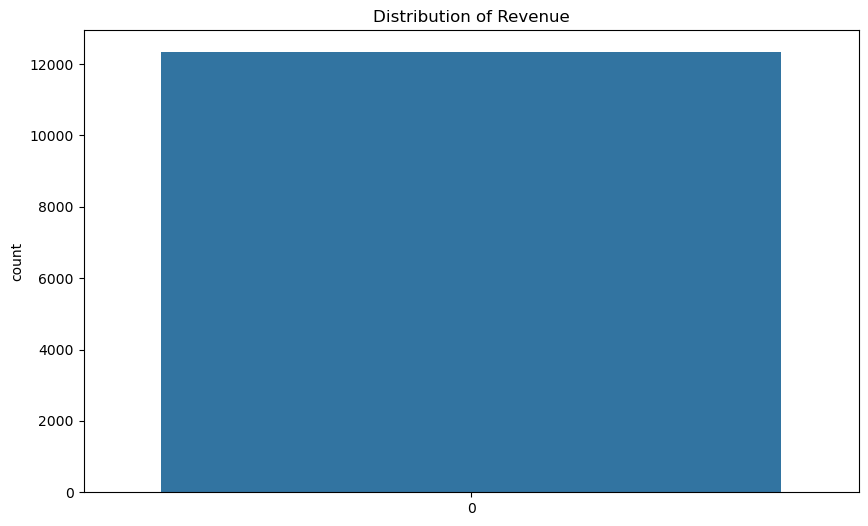

In [50]:
# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(data['Revenue'])
plt.title('Distribution of Revenue')
plt.show()


In [51]:
# Convert categorical variables to numerical
data = pd.get_dummies(data, columns=['VisitorType', 'Month'], drop_first=True)

In [52]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,VisitorType_Returning_Visitor,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,True,False,True,False,False,False,False,False,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,True,False,True,False,False,False,False,False,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,True,False,True,False,False,False,False,False,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,True,False,True,False,False,False,False,False,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,True,True,False,False,False,False,False,False,False,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,True,False,False,False,False,False,False,True,False,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,True,False,False,False,False,False,False,True,False,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,True,False,False,False,False,False,False,True,False,False


In [53]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Plotting the class distribution before SMOTE
# plt.figure(figsize=(14, 6))

# plt.subplot(1, 2, 1)
# sns.countplot(x=y)
# plt.title('Class Distribution Before SMOTE')
# plt.xlabel('Revenue')
# plt.ylabel('Count')


In [54]:
data.shape

(12330, 27)

## preprocess using SMOTE

In [55]:
# Separate features and target variable
X = data.drop('Revenue', axis=1)
y = data['Revenue']

In [56]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

In [57]:
smote

SMOTE(random_state=42)

After smote target variable distribution

In [58]:
X_sm.shape

(20844, 26)

In [59]:
y_sm.shape

(20844,)

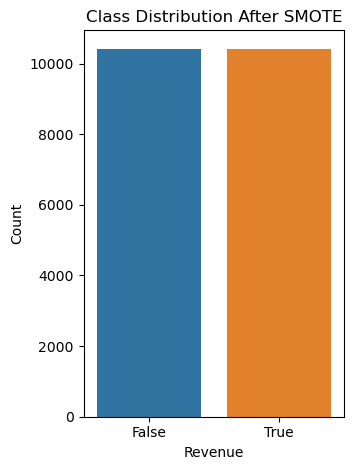

In [60]:

# Plotting the class distribution after SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_sm)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Revenue')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [61]:
print(data.shape)

(12330, 27)


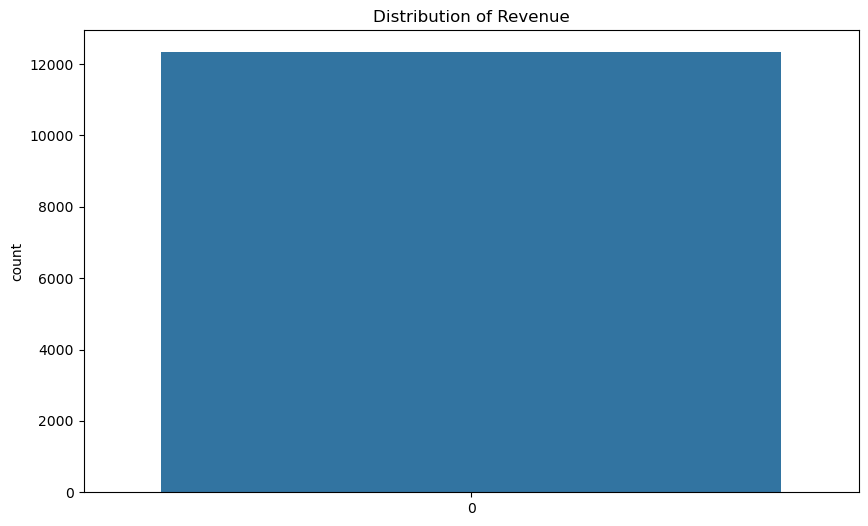

In [62]:
# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(data['Revenue'])
plt.title('Distribution of Revenue')
plt.show()

In [63]:
# plt.figure(figsize = (10, 5))
# ax = sns.countplot(
#     x = data["Revenue"], palette = palette
# )
# ax.set_title("Distribution of Target")
# # annotate bar
# for p in ax.patches:
#     ax.annotate(
#         format(p.get_height(), '.0f') + " (" + format(p.get_height()*100/len(data), '.1f') + "%)",
#         (p.get_x() + p.get_width() / 2., p.get_height()), 
#         ha = 'center',
#         fontweight = 'semibold',
#         size = 16,
#         xytext = (0, -25), 
#         textcoords = 'offset points',
#         color = 'white'
#     )
# plt.tight_layout()
# plt.show()

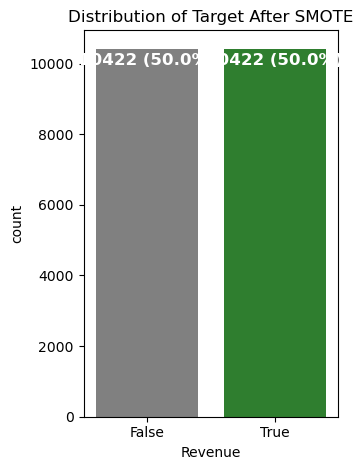

In [64]:

# Plot the class distribution after SMOTE
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x=y_sm, palette=palette)
ax2.set_title("Distribution of Target After SMOTE")
# Annotate bars
for p in ax2.patches:
    ax2.annotate(
        format(p.get_height(), '.0f') + " (" + format(p.get_height() * 100 / len(y_sm), '.1f') + "%)",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        fontweight='semibold',
        size=12,
        xytext=(0, -12),
        textcoords='offset points',
        color='white'
    )

plt.tight_layout()
plt.show()


In [65]:
# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

## scaling 

In [66]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [68]:
X_train['SessionDuration'] = X_train['ProductRelated_Duration'] + X_train['Informational_Duration'] + X_train['Administrative_Duration']
X_test['SessionDuration'] = X_test['ProductRelated_Duration'] + X_test['Informational_Duration'] + X_test['Administrative_Duration']


In [69]:
# Drop original duration columns if necessary
X_train = X_train.drop(['ProductRelated_Duration', 'Informational_Duration', 'Administrative_Duration'], axis=1)
X_test = X_test.drop(['ProductRelated_Duration', 'Informational_Duration', 'Administrative_Duration'], axis=1)

In [70]:
# IGNORE
# Optionally, you can use feature selection methods like Recursive Feature Elimination (RFE) or feature importance from a model
from sklearn.ensemble import RandomForestClassifier
importances = RandomForestClassifier().fit(X_train, y_train).feature_importances_
indices = np.argsort(importances)[::-1]

Checking feature importance using importances

## build model


In [71]:
# Build the neural network
def create_model01(optimizer='adam'):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.6))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [72]:
# trying another function 
def create_model02(optimizer='adam'):
    model = Sequential()
    model.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.6))
    model.add(Dense(128, activation='sigmoid'))
    model.add(Dropout(0.6))
    model.add(Dense(256, activation='sigmoid'))
    model.add(Dropout(0.6))
    model.add(Dense(128, activation='sigmoid'))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

## checking for Model 01 

In [73]:
model = create_model01()
model.summary()


c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,761 (335.00 KB)

 Trainable params: 85,761 (335.00 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
model2 = create_model02()
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,761 (335.00 KB)

 Trainable params: 85,761 (335.00 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=32)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6311 - loss: 0.6406 - val_accuracy: 0.8687 - val_loss: 0.3333
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8558 - loss: 0.3656 - val_accuracy: 0.8843 - val_loss: 0.2912
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8755 - loss: 0.3219 - val_accuracy: 0.8933 - val_loss: 0.2841
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8935 - loss: 0.2793 - val_accuracy: 0.8963 - val_loss: 0.2557
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8962 - loss: 0.2739 - val_accuracy: 0.8945 - val_loss: 0.2548
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8972 - loss: 0.2605 - val_accuracy: 0.9047 - val_loss: 0.2434
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8998 - loss: 0.2551 - val_accuracy: 0.9005 - val_loss: 0.2447
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9025 - loss: 0.2496 - val_accuracy: 0.

In [76]:
#for model2
history2 = model2.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=32)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5422 - loss: 0.7011 - val_accuracy: 0.8447 - val_loss: 0.3552
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8328 - loss: 0.3921 - val_accuracy: 0.8765 - val_loss: 0.3108
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8595 - loss: 0.3453 - val_accuracy: 0.8771 - val_loss: 0.2973
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8728 - loss: 0.3259 - val_accuracy: 0.8963 - val_loss: 0.2919
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8827 - loss: 0.3050 - val_accuracy: 0.8987 - val_loss: 0.2875
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8831 - loss: 0.2990 - val_accuracy: 0.8945 - val_loss: 0.2845
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8867 - loss: 0.2950 - val_accuracy: 0.8891 - val_loss: 0.2844
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8921 - loss: 0.2839 - val_accuracy: 0.

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, classification_report


In [78]:
def evulate(model):
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
    print("AUC: {:.2f}".format(roc_auc_score(y_test, y_pred_prob)))
    print("Precision: {:.2f}".format(precision_score(y_test, y_pred)))
    print("Recall: {:.2f}".format(recall_score(y_test, y_pred)))
    print("F1 Score: {:.2f}".format(f1_score(y_test, y_pred)))

    return y_pred,y_pred_prob

In [79]:
y_pred, y_pred_prob=evulate(model=model)

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Confusion Matrix:
[[1905  157]
 [ 184 1923]]
Accuracy: 91.82%
AUC: 0.98
Precision: 0.92
Recall: 0.91
F1 Score: 0.92


In [80]:
y_p,_=evulate(model=model2)

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion Matrix:
[[1860  202]
 [ 175 1932]]
Accuracy: 90.96%
AUC: 0.97
Precision: 0.91
Recall: 0.92
F1 Score: 0.91


## evulate

In [81]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.92      0.92      2062
        True       0.92      0.91      0.92      2107

    accuracy                           0.92      4169
   macro avg       0.92      0.92      0.92      4169
weighted avg       0.92      0.92      0.92      4169



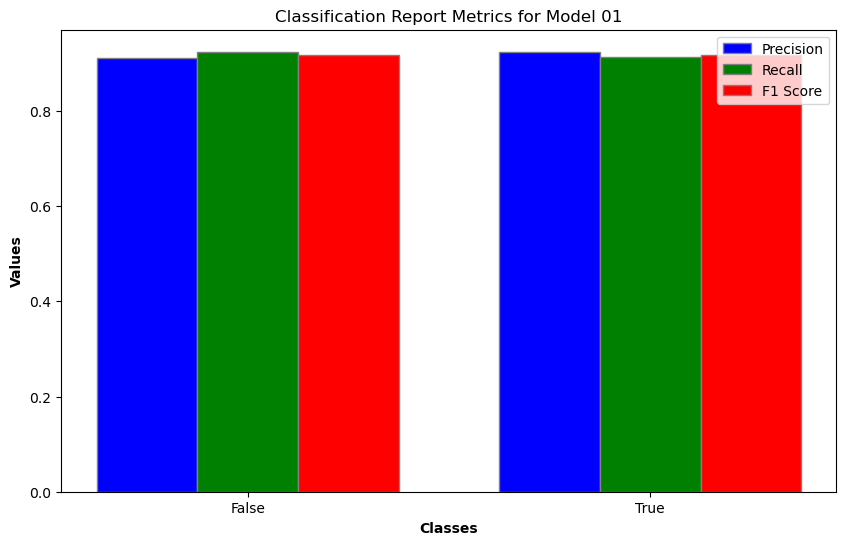

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report


report_model01 = classification_report(y_test, y_pred, output_dict=True)

classes = ['False', 'True']
metrics = ['precision', 'recall', 'f1-score']
class_labels = list(report_model01.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'

# Extract the values for each metric
values = {metric: [report_model01[label][metric] for label in class_labels] for metric in metrics}

# Bar width
bar_width = 0.25

# X locations for the groups
r1 = np.arange(len(classes))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Creating the bar plot
plt.figure(figsize=(10, 6))

# Plotting the bars
plt.bar(r1, values['precision'], color='b', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, values['recall'], color='g', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, values['f1-score'], color='r', width=bar_width, edgecolor='grey', label='F1 Score')

# Adding labels
plt.xlabel('Classes', fontweight='bold')
plt.ylabel('Values', fontweight='bold')
plt.title('Classification Report Metrics for Model 01')
plt.xticks([r + bar_width for r in range(len(classes))], classes)
plt.legend()

# Display the plot
plt.show()


In [82]:
# Additional evaluation: Precision-Recall Curve and ROC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve

In [83]:
# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)


Text(0.5, 1.0, 'Precision-Recall Curve')

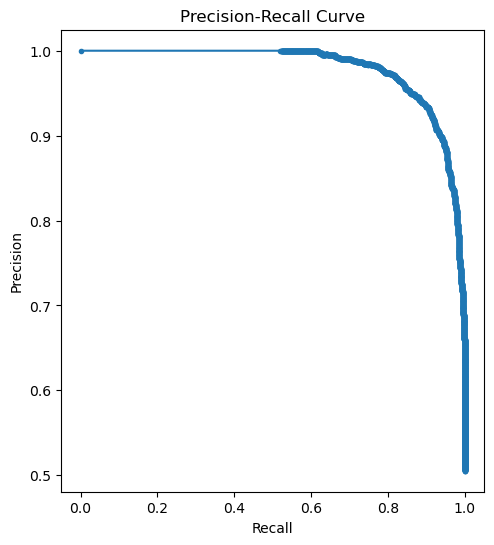

In [84]:
# Plot Precision-Recall curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

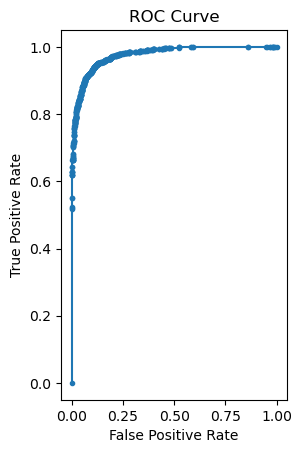

In [85]:
# Plot ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.show()

In [86]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("AUC: {:.2f}".format(roc_auc_score(y_test, y_pred_prob)))

Confusion Matrix:
[[1905  157]
 [ 184 1923]]
Accuracy: 91.82%
AUC: 0.98


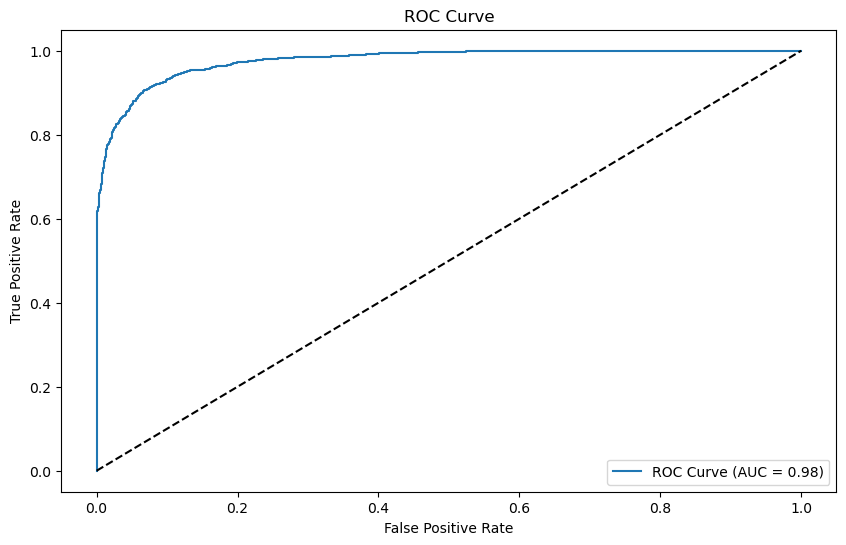

In [87]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [88]:
# pip install scikeras

import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier

## hyper parameter tunning

In [93]:
from scikeras.wrappers import KerasClassifier

# Wrap the model for use in scikit-learn
model = KerasClassifier(build_fn=create_model01, verbose=0)

# Define the grid of hyperparameters to search
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'optimizer': ['adam', 'rmsprop']
}

# Perform grid search with cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=StratifiedKFold(n_splits=3), n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# Display the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

c:\Users\User\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best: 0.916222 using {'batch_size': 64, 'epochs': 100, 'optimizer': 'adam'}


In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

In [95]:

# Extract the best estimator from grid search
best_model = grid_result.best_estimator_

# Predict probabilities on the test set using the best model
y_pred_prob = best_model.predict_proba(X_test)

# The `predict_proba` method returns probabilities for each class; we need the probability for the positive class
y_pred_prob = y_pred_prob[:, 1]

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate and display the performance metrics
print("Final Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Final Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Final AUC: {:.2f}".format(roc_auc_score(y_test, y_pred_prob)))


Final Confusion Matrix:
[[1915  147]
 [ 198 1909]]
Final Accuracy: 91.72%
Final AUC: 0.98


Evulating result after hyper parameter tunning